In [1]:
frontal='/Users/yoavfreund/projects/opencv/data/haarcascades/haarcascade_frontalface_default.xml'
filename = "/Users/yoavfreund/projects/facesAnalysis/videos/Bernie Can\'t Be The Only Candidate With An Ice Cream-z3qN-BU1b2M.mp4"
!ls -l $frontal "$filename"

-rw-r--r--  1 yoavfreund  staff  31279197 Mar 17 06:47 /Users/yoavfreund/projects/facesAnalysis/videos/Bernie Can't Be The Only Candidate With An Ice Cream-z3qN-BU1b2M.mp4
-rw-r--r--  1 yoavfreund  staff    930127 Jun  2 22:04 /Users/yoavfreund/projects/opencv/data/haarcascades/haarcascade_frontalface_default.xml


In [2]:
%pylab inline
import cv2
import pickle

Populating the interactive namespace from numpy and matplotlib


In [6]:
faceCascade = cv2.CascadeClassifier(frontal)

In [7]:
def imshow_rgb(image_bgr,Title=''):
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    imshow(image_rgb)
    if Title != '':
        title(Title)

In [8]:
vid = cv2.VideoCapture(filename)
i=0;
Faces_List=[]
while True:
    flag,frame=vid.read()
    if not flag:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(100, 100),
        flags = cv2.cv.CV_HAAR_SCALE_IMAGE
    )
    Faces_List.append(faces)
    print 'index=',i,'faces=',faces

    #image=frame
    #for (x, y, w, h) in faces:
    #    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    #imshow_rgb(image,'frame '+str(i))
    i+=1



index= 0 faces= ()
index= 1 faces= ()
index= 2 faces= ()
index= 3 faces= ()
index= 4 faces= ()
index= 5 faces= ()
index= 6 faces= ()
index= 7 faces= ()
index= 8 faces= ()
index= 9 faces= ()
index= 10 faces= ()
index= 11 faces= ()
index= 12 faces= ()
index= 13 faces= ()
index= 14 faces= ()
index= 15 faces= ()
index= 16 faces= ()
index= 17 faces= ()
index= 18 faces= ()
index= 19 faces= ()
index= 20 faces= ()
index= 21 faces= ()
index= 22 faces= ()
index= 23 faces= ()
index= 24 faces= ()
index= 25 faces= ()
index= 26 faces= ()
index= 27 faces= ()
index= 28 faces= ()
index= 29 faces= ()
index= 30 faces= ()
index= 31 faces= ()
index= 32 faces= ()
index= 33 faces= ()
index= 34 faces= ()
index= 35 faces= ()
index= 36 faces= ()
index= 37 faces= ()
index= 38 faces= ()
index= 39 faces= ()
index= 40 faces= ()
index= 41 faces= ()
index= 42 faces= ()
index= 43 faces= ()
index= 44 faces= ()
index= 45 faces= ()
index= 46 faces= ()
index= 47 faces= ()
index= 48 faces= ()
index= 49 faces= ()
index= 50 

NameError: name 'Faces_list' is not defined

In [9]:
pickle.dump(Faces_List,open('Faces.pkl','w'));

In [38]:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)


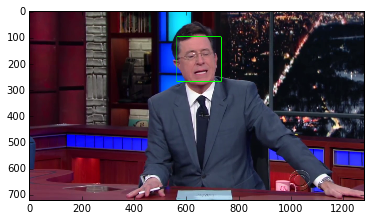

In [39]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imshow(image_rgb)

In [40]:
faces

array([[563, 101, 169, 169]], dtype=int32)

In [6]:
num=[len(X) for X in Faces_List]


In [7]:
len(num)

4698

In [20]:
plot(num[2000:2300])

In [83]:
def show_faces(i):
    vid = cv2.VideoCapture(filename)
    for j in range(i-1):
        vid.grab()
    flag,image = vid.read()
    #faces=Faces_List[i]
    faces=[list(Cleaned_Faces_List[100][1])]
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    imshow_rgb(image,'frame '+str(i))


In [182]:
size=300
def extract_face(i,image):
    if Cleaned_Faces_List[i][1] is None:
        return None
    image_h,image_w,c=shape(image)
    x,y,w,h=list(Cleaned_Faces_List[i][1])
    y0=y+h/2
    y0=min(image_h-size/2,max(size/2,y0))
    x0=x+w/2
    x0=min(image_w-size/2,max(size/2,x0))
    ymin=y0-size/2; ymax=ymin+size
    xmin=x0-size/2; xmax=xmin+size
    return image[ymin:ymax,xmin:xmax,:]


In [201]:
import cv2
fourcc = fourcc = cv2.cv.CV_FOURCC(*'mp4v') #cv2.VideoWriter_fourcc('mp4v')
out = cv2.VideoWriter('Bernie Can\'t Be The Only Candidate With An Ice Cream-z3qN-BU1b2M.mp4',fourcc, 20.0, (size,size))

In [202]:
vid = cv2.VideoCapture(filename)
Windows=[]
for j in range(len(Cleaned_Faces_List)):
    flag,image = vid.read()
    if not flag:
        print 'got to video file EOF'
        break
    I=extract_face(j,image)
    if not I is None:
        out.write(I)
    if j % 10 == 0:
        print '\r',j,
    #imshow_rgb(I,'window '+str(i))
out.release()

4690


In [185]:
[(w[0],shape(w[1])) for w in Windows[:10]]

[(58, (300, 300, 3)),
 (59, (300, 300, 3)),
 (60, (300, 300, 3)),
 (61, (300, 300, 3)),
 (62, (300, 300, 3)),
 (63, (300, 300, 3)),
 (64, (300, 300, 3)),
 (65, (300, 300, 3)),
 (66, (300, 300, 3)),
 (67, (300, 300, 3))]

In [177]:
Cleaned_Faces_List[58:63]

[(58, array([577,  66, 179, 179], dtype=int32)),
 (59, array([579,  70, 169, 169], dtype=int32)),
 (60, array([575,  74, 168, 168], dtype=int32)),
 (61, array([624, 270, 109, 109], dtype=int32)),
 (62, array([625, 270, 107, 107], dtype=int32))]

In [170]:
len(Windows)

142

In [154]:
import pickle
pickle.dump(Windows,open('Windows1.pkl','w'),protocol=2)

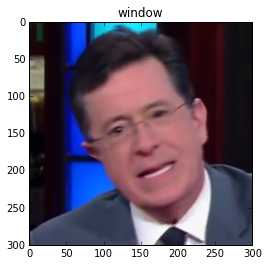

In [186]:
imshow_rgb(Windows[100][1],'window')

In [196]:
for i in range(len(Windows)):
    out.write(Windows[i][1])

In [197]:
out.release()

In [ ]:
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)

        # write the flipped frame
        out.write(frame)

In [70]:
plot(np.array(num)==1)
ylim([-0.1,1.1])

NameError: name 'num' is not defined

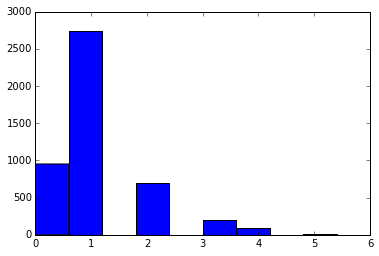

In [28]:
hist(np.array(num));

In [12]:
one_square = np.array([[i]+list(Faces_List[i][0])\
                       for i in range(len(Faces_List))\
                       if len(Faces_List[i])==1])
one_square[:10,:]

array([[ 58, 577,  66, 179, 179],
       [ 59, 579,  70, 169, 169],
       [ 63, 563,  80, 159, 159],
       [ 64, 560,  84, 150, 150],
       [ 65, 560,  86, 148, 148],
       [ 66, 561,  86, 148, 148],
       [ 67, 562,  88, 147, 147],
       [ 72, 573,  88, 152, 152],
       [ 73, 574,  84, 159, 159],
       [ 76, 580,  91, 150, 150]])

In [13]:
mean_loc = mean(one_square,axis=0)[1:]
std_loc = std(one_square,axis=0)[1:]
mean_loc,std_loc

(array([ 691.27150146,  139.62973761,  156.96902332,  156.96902332]),
 array([ 94.43538432,  36.27407119,  15.4134512 ,  15.4134512 ]))

In [14]:
diffs = one_square[1:,:]-one_square[:-1,:]
diffs[:10,:]

array([[  1,   2,   4, -10, -10],
       [  4, -16,  10, -10, -10],
       [  1,  -3,   4,  -9,  -9],
       [  1,   0,   2,  -2,  -2],
       [  1,   1,   0,   0,   0],
       [  1,   1,   2,  -1,  -1],
       [  5,  11,   0,   5,   5],
       [  1,   1,  -4,   7,   7],
       [  3,   6,   7,  -9,  -9],
       [  1,  -1,   3,  -2,  -2]])

In [15]:
from collections import Counter
Counter(diffs[:,0])

Counter({1: 2514,
         2: 111,
         3: 39,
         4: 23,
         5: 11,
         6: 6,
         7: 5,
         8: 4,
         9: 2,
         10: 6,
         11: 3,
         12: 2,
         13: 1,
         14: 1,
         15: 2,
         16: 1,
         20: 2,
         21: 1,
         26: 1,
         27: 1,
         31: 1,
         44: 1,
         48: 1,
         70: 1,
         118: 1,
         192: 1,
         556: 1})

In [16]:
consec=diffs[diffs[:,0]==1,:]
consec[:5,:]

array([[  1,   2,   4, -10, -10],
       [  1,  -3,   4,  -9,  -9],
       [  1,   0,   2,  -2,  -2],
       [  1,   1,   0,   0,   0],
       [  1,   1,   2,  -1,  -1]])

In [17]:
mean_diff=mean(consec,axis=0)[1:]
std_diff=std(consec,axis=0)[1:]
mean_diff,std_diff, mean_loc,std_loc

(array([-0.28520286,  0.07955449, -0.01193317, -0.01193317]),
 array([ 7.98094662,  5.49180662,  3.94390066,  3.94390066]),
 array([ 691.27150146,  139.62973761,  156.96902332,  156.96902332]),
 array([ 94.43538432,  36.27407119,  15.4134512 ,  15.4134512 ]))

In [58]:
def check_face(face):
    Z=0;
    for p in range(4):
        Z+=((face[p]-mean_loc[p])/(sqrt(2)*std_loc[p]))**2
    return Z

def check_shift(face,prev_face):
    Z=0
    for p in range(4):
        Z+=((face[p]-prev_face[p])/(sqrt(2)*std_diff[p]))**2
    return Z
def find_first_one(list):
    for i in range(len(list)):
        if list[i]==1:
            return i
    return -1  # return -1 if did not find a 1 in list

In [62]:
Z_threshold=5
Z2_threshold=2
Cleaned_Faces_List=[]
Well_selected=0;
No_Detections=0;
Single_Detection=0;
Multiple_faces=0;
Failure=0
for i in range(len(Faces_List)):
    faces=Faces_List[i]
    if len(faces)==0:
        No_Detections+=1
        Cleaned_Faces_List.append((i,None))
        continue
    elif len(faces)==1:
        Single_Detection+=1
        last_face=faces[0]
        last_good_frame=i
        Cleaned_Faces_List.append((i,last_face))
    else:
        Multiple_faces+=1;
        Zs=[]; Zs2=[]
        for face in faces:
            Zs.append(check_face(face))
            Zs2.append(check_shift(face,last_face))
            
        good_by_prior=[1 for j in range(len(Zs)) if Zs[j]<Z_threshold]
        count_good = sum(good_by_prior)
        if count_good==1:
            index=find_first_one(good_by_prior)
            last_face=faces[index]
            last_good_frame=i
            Cleaned_Faces_List.append((i,last_face))
            Well_selected+=1;
        if count_good !=1:
            if i-last_good_frame<5:
                good_by_shift=[1 for j in range(len(Zs2)) if Zs2[j]<Z2_threshold]
                if sum(good_by_shift)==1:
                    index=find_first_one(good_by_shift)
                    last_face=faces[index]
                    last_good_frame=i
                    Cleaned_Faces_List.append((i,last_face))
                    Well_selected+=1;
                    continue
            print 'Failure to determine face'
            print 'frame no %d:\n faces=%s\n Zs=%s'%(i,str(faces),str(Zs))
            print 'Zs2=%s'%str(Zs2)
            print 'last good frame=%d, last_face=%s'%(last_good_frame,last_face)
            Cleaned_Faces_List.append((i,None))
            Failure+=1
    
print 'total = ',len(Faces_List)
print "Well_selected=%d No_Detections=%d Single_Detection=%d Multiple_faces=%d, Failure=%d"%\
        (Well_selected, No_Detections, Single_Detection, Multiple_faces, Failure)
      

Failure to determine face
frame no 3311:
 faces=[[526 102 159 159]
 [576  88 170 170]]
 Zs=[2.0868611701037421, 2.4726544921315914]
Zs2=[10.158949020303467, 52.576729587803491]
last good frame=3310, last_face=[535 106 147 147]
Failure to determine face
frame no 3384:
 faces=[[553 284 121 121]
 [568 323 154 154]]
 Zs=[14.43781682988501, 13.66626359685826]
Zs2=[2.5875670882877126, 120.10409127584911]
last good frame=3383, last_face=[552 288 115 115]
total =  4698
Well_selected=1000 No_Detections=952 Single_Detection=2744 Multiple_faces=1002, Failure=2


In [63]:
len(Cleaned_Faces_List)

4698

In [66]:
for j in range(len(Cleaned_Faces_List)):
    if Cleaned_Faces_List[j][1]!= None:
        print j
        break

58


/Users/yoavfreund/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  from ipykernel import kernelapp as app


In [86]:
Zs=[]
for j in range(one_square.shape[0]):
    Zs.append(check_face(one_square[j,:]))

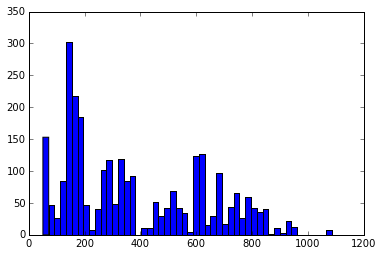

In [89]:
hist(Zs,bins=50);

In [84]:
sqrt(2)

1.4142135623730951

In [5]:
!ls

Face Detection.ipynb


In [22]:
Zs

[39.559450094272272, 2.450251681491709]

In [25]:
sum([1 for Z in Zs if Z<50])

2

In [26]:
faces

()

In [31]:
find(range(10))

In [50]:
sort([2,1,7])

array([1, 2, 7])

In [75]:
range(1)

[0]

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [203]:
imshow_rgb(Windows[100][1],'window')

IndexError: list index out of range